In [1]:
from pgd import *
import numpy as np
from IPython.display import HTML

# Lipschitz case

$\eta_t = \frac{R}{L\sqrt{t}}$ gives
$f(\bar{x_T})-f(x^*) \leq RL\sqrt{\frac{2}{T}}$  

In [2]:
class LipschitzPGD(PGD):
    def __init__(self, *args, **kwargs):
        self.lipschitz = kwargs.pop('lipschitz', 1.0)
        super().__init__(*args, **kwargs)

    def compute_upper_bound(self, t):
        return self.lipschitz*self.R/t**0.5

    def compute_eta(self,t):
        return self.R/(self.lipschitz*t**0.5)

    def compute_optimum(self, points):
        return np.mean(points[:,0])

In [3]:
# an example
def f(x):
    return np.abs(x)

def subgrad_f(x):
    return np.sign(x)

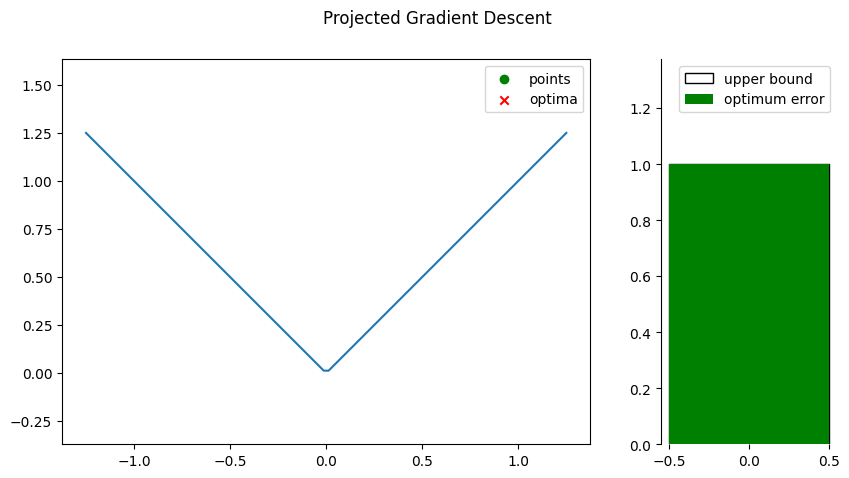

In [4]:
# animate
abs_value_example = LipschitzPGD(f, subgrad_f, x0=1, R=2.5, T=15, lipschitz=1.0)
ani = abs_value_example.animate()
HTML(ani.to_jshtml())

# Lipschitz and alpha convex

$\eta_t = \frac{2}{\alpha(t+1)}$ gives
$f(\hat{x_T})-f(x^*) \leq \frac{2L^2}{\alpha(T+1)}$  
with $\hat{x_T}$ the weighted average $\hat{x_T} = \sum_{t\leq T} \eta_t x_t / \sum_{t\leq T} \eta_t$

In [5]:
class LipschitzConvexPGD(PGD):
    def __init__(self, *args, **kwargs):
        self.lipschitz = kwargs.pop('lipschitz', 1.0)
        self.alpha_convex = kwargs.pop('alpha_convex', 1.0)
        super().__init__(*args, **kwargs)

    def compute_eta(self,t):
        return 2/(self.alpha_convex*(t+1))

    def compute_optimum(self, points):
        return np.average(points[1:,0],axis=0,weights=self.eta)
    
    def compute_upper_bound(self, t):
        return 2*self.lipschitz**2/(self.alpha_convex*(t+1))

In [6]:
# an example
def f(x):
    return 0.5*np.abs(x)+0.5*x**2

def subgrad_f(x):
    return 0.5*np.sign(x)+x

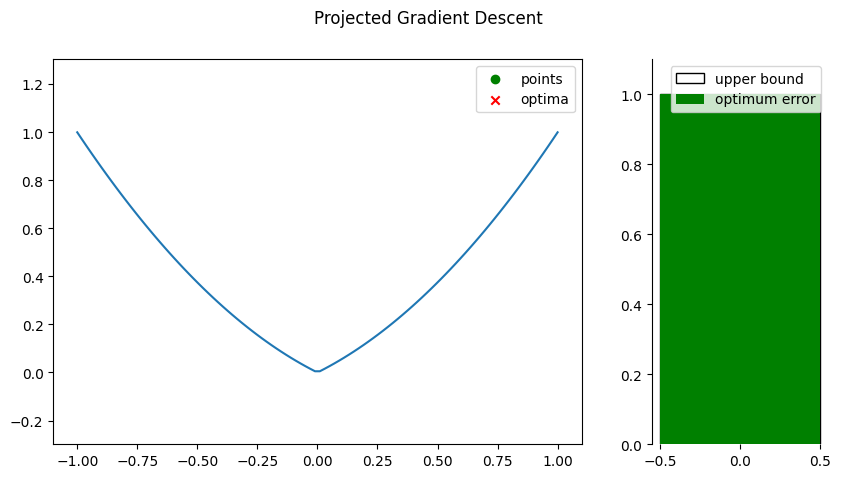

In [7]:
# animate
abs_value_example = LipschitzConvexPGD(f, subgrad_f, x0=1, R=2., T=15, lipschitz=1.0, alpha_convex=1.0)
ani = abs_value_example.animate()
HTML(ani.to_jshtml())

# Beta smooth
$\eta_t = \frac{1}{\beta}$ gives
$f(x_t)-f(x^*) \leq \frac{3\beta R^2 + f(x_1)-f(x_*)}{t}$  

In [8]:
class SmoothPGD(PGD):
    def __init__(self, *args, **kwargs):
        self.beta_smooth = kwargs.pop('beta_smooth', 1.0)
        super().__init__(*args, **kwargs)

    def compute_eta(self,t):
        return 1/self.beta_smooth

    def compute_optimum(self, points):
        return self.points[-1,0]
    
    def compute_upper_bound(self, t):
        num = 3*self.beta_smooth*self.R**2 + self.errors[0]
        return num/t

In [9]:
# an example
def f(x):
    return np.cosh(x)

def subgrad_f(x):
    return np.sinh(x)

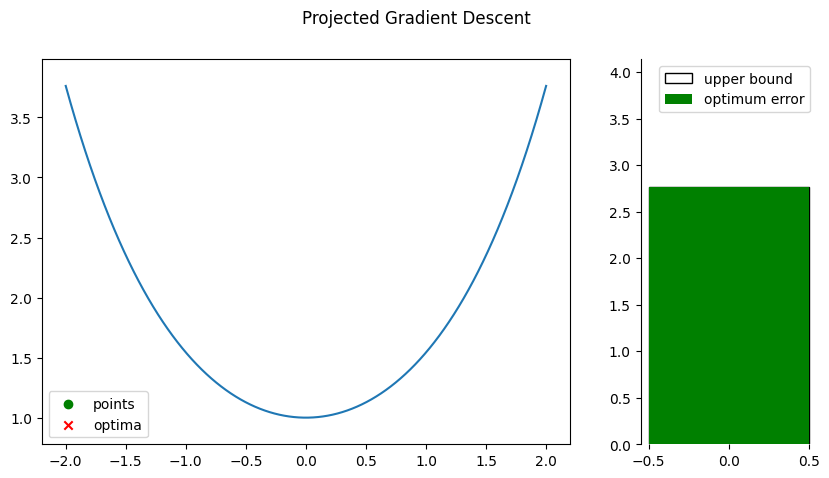

In [10]:
# animate
abs_value_example = SmoothPGD(f, subgrad_f, x0=2, R=4, T=15, beta_smooth=np.cosh(2))
ani = abs_value_example.animate()
HTML(ani.to_jshtml())

# Beta smooth and alpha convex
$\eta_t = \frac{1}{\beta}$ gives
$||x_t-x_*||^2 \leq e^{-t/\kappa} ||x_1-x_*||^2 $  
that is to say:
$f(x_t)-f(x_*) \leq \frac{\beta}{2} e^{-t/\kappa} R^2$

In [11]:
class SmoothConvexPGD(SmoothPGD):
    def __init__(self, *args, **kwargs):
        self.alpha_convex = kwargs.pop('alpha_convex', 1.0)
        self.condition_number = kwargs['beta_smooth']/self.alpha_convex
        super().__init__(*args, **kwargs)
    
    def compute_upper_bound(self, t):
        return np.exp(-t/self.condition_number)*self.beta_smooth*self.R**2/2

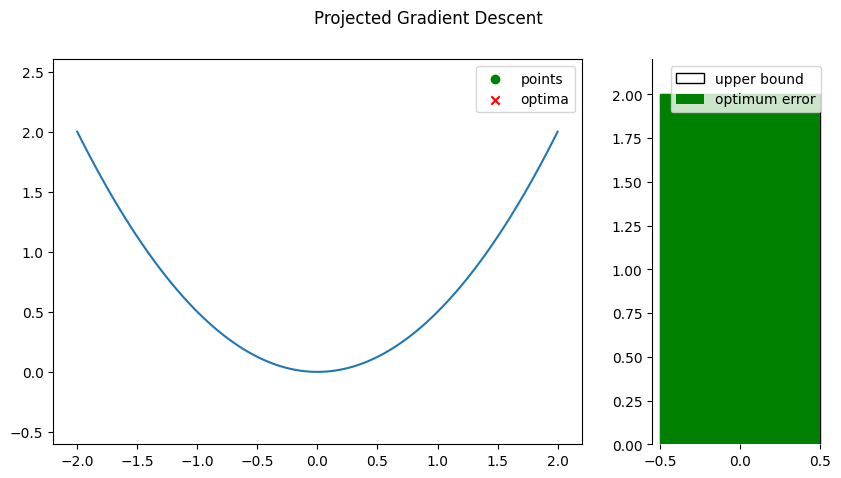

In [12]:
# an example
def f(x):
    return 0.5*x**2

def subgrad_f(x):
    return x

# animate
abs_value_example = SmoothConvexPGD(f, subgrad_f, x0=2, R=4, T=15, beta_smooth=1., alpha_convex=1.0)
ani = abs_value_example.animate()
HTML(ani.to_jshtml())